In [1]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.ToTensor()

In [2]:
#Loading datasets

train_dataset = datasets.MNIST(root = 'data',train = True, download = True ,transform = transform)
test_dataset = datasets.MNIST(root = 'data',train = False, download = True ,transform = transform)

In [3]:
num_workers = 0
batch_size = 25

#Data_loaders

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, num_workers = num_workers)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, num_workers = num_workers)

In [4]:
#Visualise the Data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

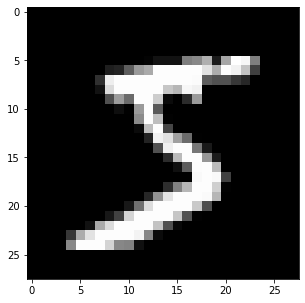

In [5]:
img = np.squeeze(images[0])
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

## Linear Autoencoder

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        
        #encoder
        self.a1 = nn.Linear(784, encoding_dim)
        
        #decoder
        self.a2 = nn.Linear(encoding_dim, 784)
        
    def forward(self,x):
        x = F.relu(self.a1(x))
        x = F.sigmoid(self.a2(x))
        
        return x

In [7]:
encoding_dim = 32
model = Autoencoder(encoding_dim)
print(model)

Autoencoder(
  (a1): Linear(in_features=784, out_features=32, bias=True)
  (a2): Linear(in_features=32, out_features=784, bias=True)
)


In [8]:
#Training

criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [9]:
n_epochs = 20

for epoch in range(1,n_epochs+1):
    train_loss = 0.00
    
    for data in train_loader:
        images, _ = data
        images = images.view(images.size(0), -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, images)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
        
    train_loss = train_loss/len(train_loader)
    print(f'Epoch: {epoch} \tTraining Loss: {train_loss}')

C:\Users\HP\anaconda3\lib\site-packages\torch\nn\functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 1 	Training Loss: 0.8559359978535213
Epoch: 2 	Training Loss: 0.4109529948036652
Epoch: 3 	Training Loss: 0.3386223154181304
Epoch: 4 	Training Loss: 0.31871083891989355
Epoch: 5 	Training Loss: 0.31273962050424114
Epoch: 6 	Training Loss: 0.30952482751066174
Epoch: 7 	Training Loss: 0.30740143863658886
Epoch: 8 	Training Loss: 0.30555397082450025
Epoch: 9 	Training Loss: 0.30404104629997164
Epoch: 10 	Training Loss: 0.30286534629218903
Epoch: 11 	Training Loss: 0.3019373152734867
Epoch: 12 	Training Loss: 0.3011411699456706
Epoch: 13 	Training Loss: 0.3004563394060824
Epoch: 14 	Training Loss: 0.29984565307192196
Epoch: 15 	Training Loss: 0.2992799115212013
Epoch: 16 	Training Loss: 0.2987442196996805
Epoch: 17 	Training Loss: 0.2982397676193311
Epoch: 18 	Training Loss: 0.29775128947221674
Epoch: 19 	Training Loss: 0.297288643802555
Epoch: 20 	Training Loss: 0.29685613938393846


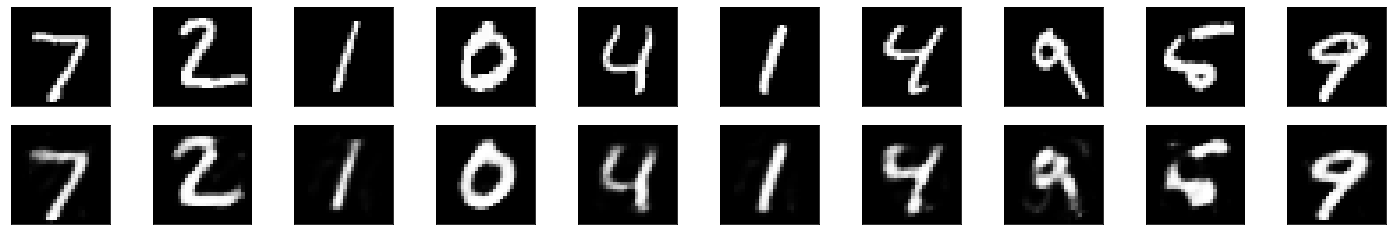

In [10]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

images_flatten = images.view(images.size(0), -1)
output = model(images_flatten)

images = images.numpy()

output = output.view(batch_size, 1, 28, 28)
output = output.detach().numpy()

# plotting the first ten input images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)